In [1]:
from src.data_utils import *
from src.plot_utils import plot_standardized_comparison
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploratory Data Analysis

Visualize relationships between atmospheric variables and sea ice extent to identify potential predictive features.

In [9]:
# Load data using new flexible API - no more manual concatenation!
data = load_data(regions='Central', years=range(2000, 2006))

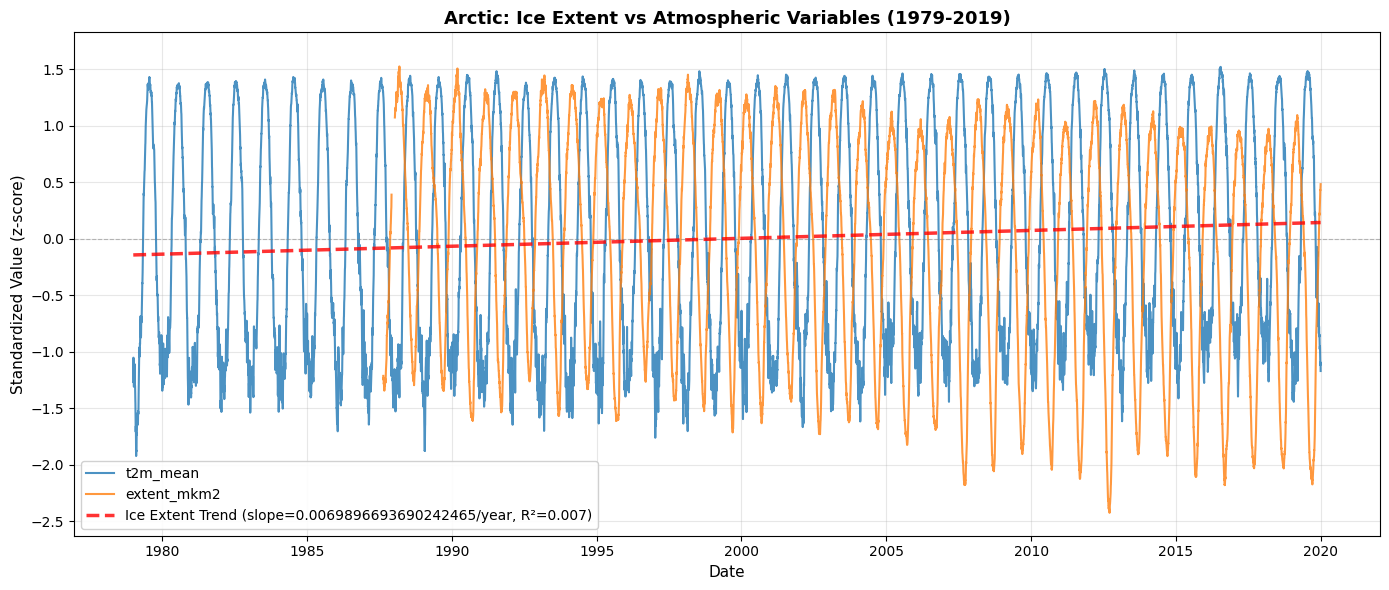

In [3]:
fig, ax = plot_standardized_comparison(
    data,
    columns=['t2m_mean', 'extent_mkm2'],
    title='Arctic: Ice Extent vs Atmospheric Variables (1979-2019)'
)

from scipy import stats

x = np.arange(len(data))
extent_standardized = (data['t2m_mean'] - data['t2m_mean'].mean()) / data['t2m_mean'].std()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, extent_standardized)
trend_line = slope * x + intercept

ax.plot(data['date'], trend_line, 'r--', linewidth=2.5, alpha=0.8,
        label=f'Ice Extent Trend (slope={slope* 365 }/year, R²={r_value**2:.3f})')

ax.legend(loc='best', fontsize=10, framealpha=0.9)

plt.show()

In [10]:
data_bering = load_data(regions='Bering', years=range(2000, 2006))
data_east = load_data(regions='East', years=range(2000, 2006))
full_data = pd.concat([data_bering, data_east, data])

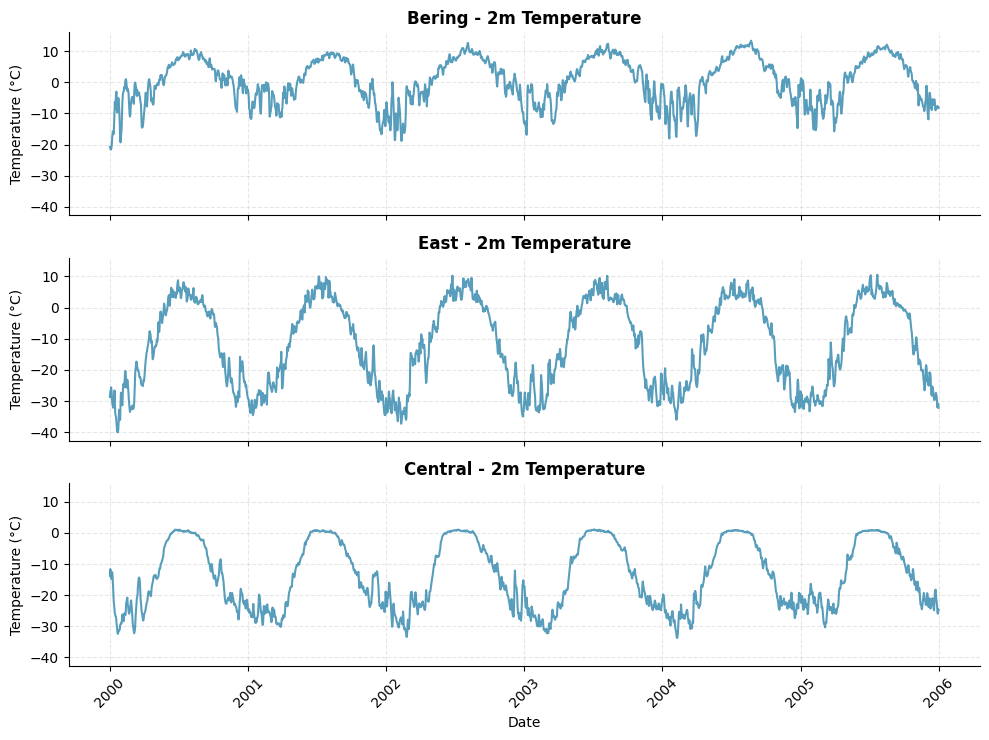

In [12]:
import seaborn as sns

# Create FacetGrid showing t2m_mean for three regions
g = sns.FacetGrid(
    full_data, 
    row='region', 
    height=2.5, 
    aspect=4,
    sharey=True
)

# Map line plot for temperature over time
g.map_dataframe(
    sns.lineplot,
    x='date',
    y='t2m_mean',
    color='#2E86AB',
    linewidth=1.5,
    alpha=0.8
)

# Customize each subplot
for ax, region in zip(g.axes.flat, full_data['region'].unique()):
    ax.set_title(f'{region} - 2m Temperature', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Temperature (°C)', fontsize=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

g.tight_layout()
plt.show()